In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline

# 그래프 한글처리

In [41]:
path = 'c:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)

# 1. 자료수집(웹 크롤링)

In [42]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import urllib
import time

In [43]:
tmp1 = 'https://search.naver.com/search.naver?where=kin'
html = tmp1 + '&sm=tab_jum&ie=utf8&query={key_word}&start={num}'

response = urlopen(html.format(num=1, key_word=urllib.parse.quote('남자 친구 선물')))
soup = BeautifulSoup(response, 'html.parser')

tmp = list(map(lambda i: i.text,soup.select('dl')))

In [44]:
from tqdm import tqdm_notebook

present_candi_text = []

# 10000 개 자료요청
for n in tqdm_notebook(range(1, 1000, 10)):
    response = urlopen(html.format(num=n, key_word=urllib.parse.quote('남자 친구 선물')))
    soup = BeautifulSoup(response, "html.parser")
    tmp = list(map(lambda i: i.text,soup.select('dl')))
    present_candi_text.extend(tmp[2:-1])
    time.sleep(0.5)

C:\ProgramData\Anaconda3\envs\collect\lib\site-packages\ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [45]:
len(present_candi_text)

1000

In [46]:
import nltk
from konlpy.tag import Okt
t = Okt()

In [47]:
present_text = '\n'.join(present_candi_text)

In [48]:
tokens_ko = t.morphs(present_text)
tokens_ko

['질문',
 '20',
 '대',
 '남자친구',
 '선물',
 '괜찮',
 '은',
 '게',
 '있나요',
 '?',
 '2020.06',
 '.',
 '02',
 '.',
 '혹시',
 '20',
 '대',
 '남자친구',
 '선물',
 '잘',
 '아시',
 '는',
 '분',
 '있으면',
 '도움',
 '받아',
 '보려고',
 '하는데요',
 '.',
 '지갑',
 ',',
 '신발',
 ',',
 '면도기',
 '등',
 '일반',
 '적',
 '인',
 '선물',
 '을',
 '이미',
 '한번',
 '씩',
 '해봐서',
 '이번',
 '에는',
 '특별한',
 '선물',
 '사주고',
 '...',
 '답변',
 '여자',
 '분',
 '은',
 '화장품',
 ',',
 '귀걸이',
 '등',
 '선물',
 '해',
 '줄',
 '수',
 '있는',
 '품목',
 '이',
 '많은데',
 ',',
 '남자',
 '선물',
 '은',
 '항상',
 '고민',
 '되는',
 '주제',
 '이',
 '져',
 'ㅠㅠㅠ',
 '저',
 '도',
 '남자친구',
 '한테',
 '매번',
 '생일',
 '마다',
 '뭘',
 '선물',
 '해줘어야',
 '하나',
 '한',
 '...',
 '닉네임',
 '호루',
 '질문',
 '남자친구',
 '부모님',
 '선물',
 '부담',
 '없',
 '는걸',
 '로',
 '...',
 '2020.07',
 '.',
 '19',
 '.',
 '안녕하세요',
 '~',
 '4년',
 '정도',
 '만난',
 '남자친구',
 '부모님',
 '선물',
 '을',
 '처음',
 '으로',
 '준비',
 '하려다',
 '보니',
 '굉장히',
 '고민',
 '이',
 '많이',
 '되더라구요',
 'ㅠㅠ',
 '어떤',
 '것',
 '으로',
 '해드리는게',
 '좋을지',
 '..',
 '남자친구',
 '부모님',
 '선물',
 '을',
 '...',
 '답변',
 '남자친구',
 '부모님',
 '선물',
 '로

In [49]:
ko = nltk.Text(tokens_ko, name="남자 친구 선물")
print(len(ko.tokens))
print(len(set(ko.tokens)))

74700
385


In [50]:
ko.vocab().most_common(100)

[('선물', 4300),
 ('남자친구', 3500),
 ('.', 2000),
 ('...', 1500),
 ('이', 1400),
 ('을', 1200),
 ('질문', 1100),
 (',', 1000),
 ('답변', 1000),
 ('닉네임', 1000),
 ('추천', 900),
 ('20', 700),
 ('대', 700),
 ('에', 700),
 ('생일', 600),
 ('로', 600),
 ('가', 600),
 ('은', 500),
 ('분', 500),
 ('도', 500),
 ('부모님', 500),
 ('으로', 500),
 ('어떤', 500),
 ('것', 500),
 ('?', 400),
 ('신발', 400),
 ('등', 400),
 ('적', 400),
 ('고민', 400),
 ('안녕하세요', 400),
 ('골프', 400),
 ('요', 400),
 ('주년', 400),
 ('기념일', 400),
 ('군인', 400),
 ('는', 300),
 ('인', 300),
 ('줄', 300),
 ('수', 300),
 ('저', 300),
 ('한', 300),
 ('부담', 300),
 ('2020.07', 300),
 ('~', 300),
 ('준비', 300),
 ('ㅠㅠ', 300),
 ('용품', 300),
 ('좀', 300),
 ('****', 300),
 ('중', 300),
 ('군대', 300),
 ('커플', 300),
 ('1', 300),
 ('케이스', 300),
 ('이고', 300),
 ('/', 300),
 ('2020.06', 200),
 ('잘', 200),
 ('있으면', 200),
 ('하는데요', 200),
 ('지갑', 200),
 ('있는', 200),
 ('남자', 200),
 ('되는', 200),
 ('한테', 200),
 ('뭘', 200),
 ('하나', 200),
 ('19', 200),
 ('..', 200),
 ('더', 200),
 ('!', 200),
 (

In [51]:
stop_words = ['.','가','요','답변','...','을','수','에','질문','제','를','이','도',
                      '좋','1','는','로','으로','2','것','은','다',',','니다','대','들',
                      '2017','들','데','..','의','때','겠','고','게','네요','한','일','할',
                      '10','?','하는','06','주','려고','인데','거','좀','는데','~','ㅎㅎ',
                      '하나','이상','20','뭐','까','있는','잘','습니다','다면','했','주려',
                      '지','있','못','후','중','줄','6','과','어떤','기본','!!',
                      '단어','선물해','라고','중요한','합','가요','....','보이','네','무지',
             '****','!','(',')'
             ]

tokens_ko = [each_word for each_word in tokens_ko 
                            if each_word not in stop_words]

ko = nltk.Text(tokens_ko, name='남자 친구 선물')
ko.vocab().most_common(50)

[('선물', 4300),
 ('남자친구', 3500),
 ('닉네임', 1000),
 ('추천', 900),
 ('생일', 600),
 ('분', 500),
 ('부모님', 500),
 ('신발', 400),
 ('등', 400),
 ('적', 400),
 ('고민', 400),
 ('안녕하세요', 400),
 ('골프', 400),
 ('주년', 400),
 ('기념일', 400),
 ('군인', 400),
 ('인', 300),
 ('저', 300),
 ('부담', 300),
 ('2020.07', 300),
 ('준비', 300),
 ('ㅠㅠ', 300),
 ('용품', 300),
 ('군대', 300),
 ('커플', 300),
 ('케이스', 300),
 ('이고', 300),
 ('/', 300),
 ('2020.06', 200),
 ('있으면', 200),
 ('하는데요', 200),
 ('지갑', 200),
 ('남자', 200),
 ('되는', 200),
 ('한테', 200),
 ('뭘', 200),
 ('19', 200),
 ('더', 200),
 ('골린', 200),
 ('개월', 200),
 ('찬데', 200),
 ('근데', 200),
 ('옷', 200),
 ('스토어', 200),
 ('가격', 200),
 ('두', 200),
 ('달', 200),
 ('차량', 200),
 ('-', 200),
 ('필수', 200)]

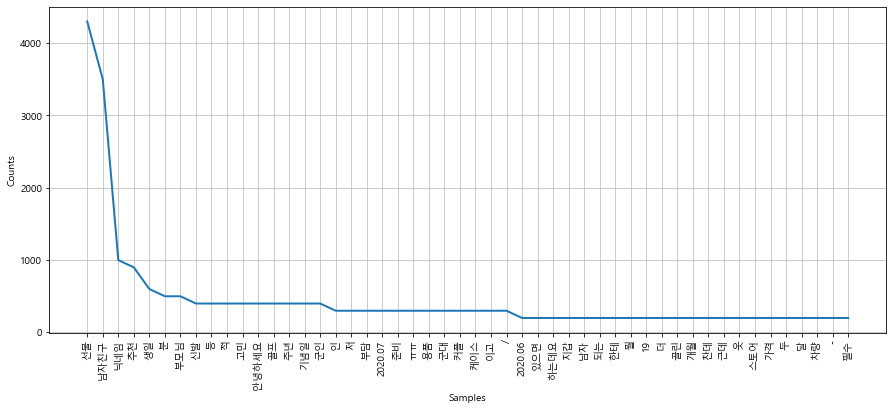

In [52]:
plt.figure(figsize=(15,6))
ko.plot(50) 
plt.show()

In [53]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

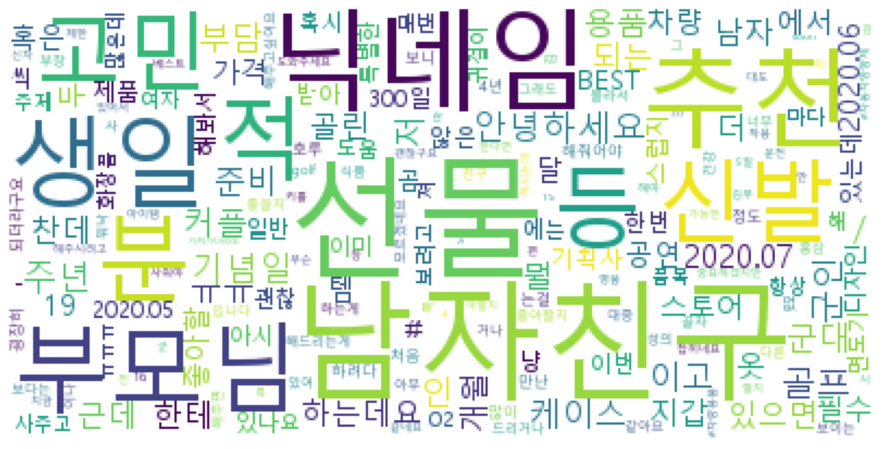

In [54]:
data = ko.vocab().most_common(300)

# for win : font_path='c:/Windows/Fonts/malgun.ttf'
wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.2,
                      #stopwords=STOPWORDS,
                      background_color='white',
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [55]:
mask = np.array(Image.open('DataScience/data/09. heart.jpg'))

from wordcloud import ImageColorGenerator

image_colors = ImageColorGenerator(mask)

In [56]:
data = ko.vocab().most_common(200)

# for win : font_path='c:/Windows/Fonts/malgun.ttf'
wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
               relative_scaling = 0.1, mask=mask,
               background_color = 'white',
               min_font_size=1,
               max_font_size=100).generate_from_frequencies(dict(data))

default_colors = wordcloud.to_array()

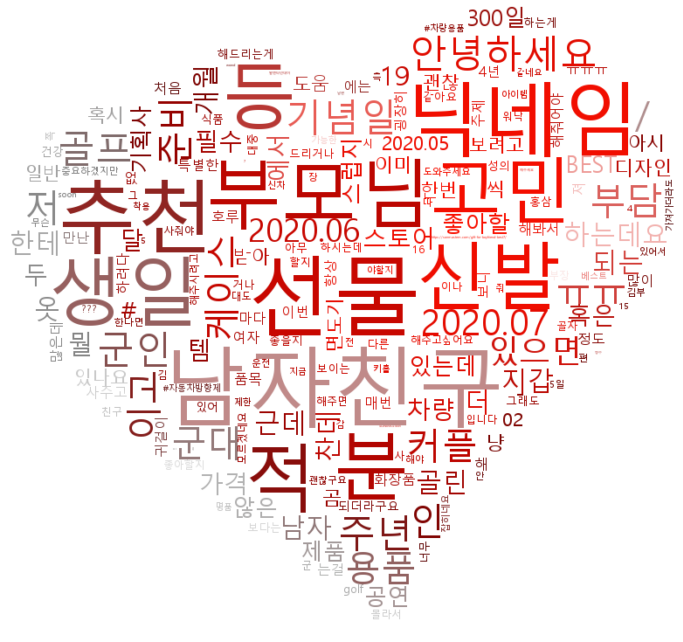

In [57]:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()

In [58]:
import gensim
from gensim.models import word2vec

In [59]:
#twitter = Twitter()
twitter = Okt()
results = []
lines = present_candi_text
# 조사등 제거 작업
for line in lines:
    malist = twitter.pos(line, norm=True, stem=True)
    r= []
    
    for word in malist:
        if not word[1] in ["Josa", "Eomi", "Punctuation"]:
            r.append(word[0])
            
    r1 = (" ".join(r)).strip()
    results.append(r1)
    print(r1)

질문 20 대다 남자친구 선물 괜찮다 은 있다 2020.06 02 혹시 20 대다 남자친구 선물 자다 아시 분 있다 도움 받다 보다 하다 지갑 신발 면도기 등 일반 적 선물 이미 한번 씩 해보다 이번 특별하다 선물 사주다 답변 여자 분 화장품 귀걸이 등 선물 하다 줄 수 있다 품목 많다 남자 선물 항상 고민 되다 주제 이 지다 ㅠㅠㅠ 저 남자친구 매번 생일 뭘 선물 해주다 하나 하다 닉네임 호루
질문 남자친구 부모님 선물 부담 없다 2020.07 19 안녕하다 4년 정도 만난 남자친구 부모님 선물 처음 준비 하다 보다 굉장하다 고민 많이 되다 ㅠㅠ 어떤 것 해드리다 좋다 남자친구 부모님 선물 답변 남자친구 부모님 선물 홍삼 그래도 다른 건강 식품 더 준비 하다 성의 있다 보이다 것 같다 남자친구 부모님 선물 아무 거나 사 드리다 너무 대중 적 것 닉네임 golf
질문 남자친구 골린 10 개월 차다 선물 2020.07 16 남자친구 골린 10 개월 차다 선물 하나 해주다 근데 저 골프 골자 모르다 뭘 해주다 좋아하다 모르다 ㅠㅠ 옷 신발 그 쪽 워낙 남자친구 답변 안녕하다 골프 스토어 김 부장 이다 남자 친구 선물 골프 용품 선물 해주다 하다 어떻다 사주다 하다 고민 시 군 가격 대도 중요하다 20 닉네임 골프 스토어 김부 장
질문 남자친구 생일 선물 추천 좀 5일 전 두 달 후 남자친구 생일 무슨 선물 하다 하다 지다 감 안 잡히다 도와주다 따다 흑 답변 남자친구 가다 운전 하다 차량 용품 도 괜찮다 남자친구 선물 추천 차량 용품 편 #자동차방향제 등 신차 필수 아이템 추천 #차량용품 베스트 BEST 5 명품 키홀 더 닉네임 soon
질문 남자친구 4 주년 선물 2020.06 15 어떻다 선물 주다 야하다 고민 중 남자친구 지금 군대 있다 줄 수 있다 선물 제한 되다 것 같다 군대 착용 가능하다 커플 템 혹은 못 가져가다 좋아하다 답변 https://sonmastem.com/gift-for-boyfriend-best7/ 20 대다 30 대다 남자친구 선물 추천

질문 남자친구 부모님 선물 부담 없다 2020.07 19 안녕하다 4년 정도 만난 남자친구 부모님 선물 처음 준비 하다 보다 굉장하다 고민 많이 되다 ㅠㅠ 어떤 것 해드리다 좋다 남자친구 부모님 선물 답변 남자친구 부모님 선물 홍삼 그래도 다른 건강 식품 더 준비 하다 성의 있다 보이다 것 같다 남자친구 부모님 선물 아무 거나 사 드리다 너무 대중 적 것 닉네임 golf
질문 남자친구 골린 10 개월 차다 선물 2020.07 16 남자친구 골린 10 개월 차다 선물 하나 해주다 근데 저 골프 골자 모르다 뭘 해주다 좋아하다 모르다 ㅠㅠ 옷 신발 그 쪽 워낙 남자친구 답변 안녕하다 골프 스토어 김 부장 이다 남자 친구 선물 골프 용품 선물 해주다 하다 어떻다 사주다 하다 고민 시 군 가격 대도 중요하다 20 닉네임 골프 스토어 김부 장
질문 남자친구 생일 선물 추천 좀 5일 전 두 달 후 남자친구 생일 무슨 선물 하다 하다 지다 감 안 잡히다 도와주다 따다 흑 답변 남자친구 가다 운전 하다 차량 용품 도 괜찮다 남자친구 선물 추천 차량 용품 편 #자동차방향제 등 신차 필수 아이템 추천 #차량용품 베스트 BEST 5 명품 키홀 더 닉네임 soon
질문 남자친구 4 주년 선물 2020.06 15 어떻다 선물 주다 야하다 고민 중 남자친구 지금 군대 있다 줄 수 있다 선물 제한 되다 것 같다 군대 착용 가능하다 커플 템 혹은 못 가져가다 좋아하다 답변 https://sonmastem.com/gift-for-boyfriend-best7/ 20 대다 30 대다 남자친구 선물 추천 BEST 7 SONMASTEM 남자친구 남편 생일 혹은 기념일 발렌타인데이 어떻다 선물 닉네임 wowd
질문 남자친구 기념일 선물 2020.07 01 남자친구 줄 1 주년 선물 추천 해주다 옷 지갑 향수 커플링 커플티 커플 신발 이렇다 말다 답변 안녕하다 공연 기획사 파릇입니 남자친구 분 1 주년 선물 찾다 계시다 질문 자 님 남자친구 분 두 분 모두 만족하다 1 주년 선물 닉네임 공연 기획사 

질문 남자친구 부모님 선물 부담 없다 2020.07 19 안녕하다 4년 정도 만난 남자친구 부모님 선물 처음 준비 하다 보다 굉장하다 고민 많이 되다 ㅠㅠ 어떤 것 해드리다 좋다 남자친구 부모님 선물 답변 남자친구 부모님 선물 홍삼 그래도 다른 건강 식품 더 준비 하다 성의 있다 보이다 것 같다 남자친구 부모님 선물 아무 거나 사 드리다 너무 대중 적 것 닉네임 golf
질문 남자친구 골린 10 개월 차다 선물 2020.07 16 남자친구 골린 10 개월 차다 선물 하나 해주다 근데 저 골프 골자 모르다 뭘 해주다 좋아하다 모르다 ㅠㅠ 옷 신발 그 쪽 워낙 남자친구 답변 안녕하다 골프 스토어 김 부장 이다 남자 친구 선물 골프 용품 선물 해주다 하다 어떻다 사주다 하다 고민 시 군 가격 대도 중요하다 20 닉네임 골프 스토어 김부 장
질문 남자친구 생일 선물 추천 좀 5일 전 두 달 후 남자친구 생일 무슨 선물 하다 하다 지다 감 안 잡히다 도와주다 따다 흑 답변 남자친구 가다 운전 하다 차량 용품 도 괜찮다 남자친구 선물 추천 차량 용품 편 #자동차방향제 등 신차 필수 아이템 추천 #차량용품 베스트 BEST 5 명품 키홀 더 닉네임 soon
질문 남자친구 4 주년 선물 2020.06 15 어떻다 선물 주다 야하다 고민 중 남자친구 지금 군대 있다 줄 수 있다 선물 제한 되다 것 같다 군대 착용 가능하다 커플 템 혹은 못 가져가다 좋아하다 답변 https://sonmastem.com/gift-for-boyfriend-best7/ 20 대다 30 대다 남자친구 선물 추천 BEST 7 SONMASTEM 남자친구 남편 생일 혹은 기념일 발렌타인데이 어떻다 선물 닉네임 wowd
질문 남자친구 기념일 선물 2020.07 01 남자친구 줄 1 주년 선물 추천 해주다 옷 지갑 향수 커플링 커플티 커플 신발 이렇다 말다 답변 안녕하다 공연 기획사 파릇입니 남자친구 분 1 주년 선물 찾다 계시다 질문 자 님 남자친구 분 두 분 모두 만족하다 1 주년 선물 닉네임 공연 기획사 

질문 남자친구 생일 선물 추천 좀 5일 전 두 달 후 남자친구 생일 무슨 선물 하다 하다 지다 감 안 잡히다 도와주다 따다 흑 답변 남자친구 가다 운전 하다 차량 용품 도 괜찮다 남자친구 선물 추천 차량 용품 편 #자동차방향제 등 신차 필수 아이템 추천 #차량용품 베스트 BEST 5 명품 키홀 더 닉네임 soon
질문 남자친구 4 주년 선물 2020.06 15 어떻다 선물 주다 야하다 고민 중 남자친구 지금 군대 있다 줄 수 있다 선물 제한 되다 것 같다 군대 착용 가능하다 커플 템 혹은 못 가져가다 좋아하다 답변 https://sonmastem.com/gift-for-boyfriend-best7/ 20 대다 30 대다 남자친구 선물 추천 BEST 7 SONMASTEM 남자친구 남편 생일 혹은 기념일 발렌타인데이 어떻다 선물 닉네임 wowd
질문 남자친구 기념일 선물 2020.07 01 남자친구 줄 1 주년 선물 추천 해주다 옷 지갑 향수 커플링 커플티 커플 신발 이렇다 말다 답변 안녕하다 공연 기획사 파릇입니 남자친구 분 1 주년 선물 찾다 계시다 질문 자 님 남자친구 분 두 분 모두 만족하다 1 주년 선물 닉네임 공연 기획사 파릇
질문 남자친구 300일 선물 추천 좀 햐주 2020.03 21 남자친구 300일 선물 추천 좀 햐주세 ㅠㅠ 웬만하다 다 선물 하다 딱하다 하다 없다 ㅠ 답변 남자친구 선물 마리오 케이스 추천 해드리다 실용 적 커플 케이스 도 싸다 여러 개 사도 괜찮다 젤리 하드 악세사리 에어팟 케이스 키링 등 이 것 이쁘다 닉네임 비건 물주
질문 남자친구 선물 2020.01 06 안녕하다 저 중 3 여학생 이다 남자친구 있다 한 살 연하 중 2 근데 기념일 날 선물 하다 어떻다 선물 나다 답변 남자친구 기념일 선물 무드미 달 무드등 어떻다 학생 구매 하다 부담 않다 가격 대의 제품 남녀 노소 누구 좋아하다 리얼 보름달 디자인 닉네임 무 드미
질문 남자친구 생일 선물 2020.05 31 훈련소 위치 뜨다 그때 소포 보내다 수 있다 하다 군인 남자친

질문 남자친구 4 주년 선물 2020.06 15 어떻다 선물 주다 야하다 고민 중 남자친구 지금 군대 있다 줄 수 있다 선물 제한 되다 것 같다 군대 착용 가능하다 커플 템 혹은 못 가져가다 좋아하다 답변 https://sonmastem.com/gift-for-boyfriend-best7/ 20 대다 30 대다 남자친구 선물 추천 BEST 7 SONMASTEM 남자친구 남편 생일 혹은 기념일 발렌타인데이 어떻다 선물 닉네임 wowd
질문 남자친구 기념일 선물 2020.07 01 남자친구 줄 1 주년 선물 추천 해주다 옷 지갑 향수 커플링 커플티 커플 신발 이렇다 말다 답변 안녕하다 공연 기획사 파릇입니 남자친구 분 1 주년 선물 찾다 계시다 질문 자 님 남자친구 분 두 분 모두 만족하다 1 주년 선물 닉네임 공연 기획사 파릇
질문 남자친구 300일 선물 추천 좀 햐주 2020.03 21 남자친구 300일 선물 추천 좀 햐주세 ㅠㅠ 웬만하다 다 선물 하다 딱하다 하다 없다 ㅠ 답변 남자친구 선물 마리오 케이스 추천 해드리다 실용 적 커플 케이스 도 싸다 여러 개 사도 괜찮다 젤리 하드 악세사리 에어팟 케이스 키링 등 이 것 이쁘다 닉네임 비건 물주
질문 남자친구 선물 2020.01 06 안녕하다 저 중 3 여학생 이다 남자친구 있다 한 살 연하 중 2 근데 기념일 날 선물 하다 어떻다 선물 나다 답변 남자친구 기념일 선물 무드미 달 무드등 어떻다 학생 구매 하다 부담 않다 가격 대의 제품 남녀 노소 누구 좋아하다 리얼 보름달 디자인 닉네임 무 드미
질문 남자친구 생일 선물 2020.05 31 훈련소 위치 뜨다 그때 소포 보내다 수 있다 하다 군인 남자친구 선물 준비 있다 이 리스트 넣다 되다 요 이 거 괜찮다 제품 있다 군인 답변 군인 남자친구 선물 군입대 준비물 기능 성 다이소 신발 평발 행군 군대 군화 메모리 폼 얼리다 트렌디 숍 오 래서 있다 장시간 서서 일해 야하다 직업 이 라면 필수 템 닉네임 군인 곰신 곰 곰
질문 20 대 남자친구 선물 사려 고해 2

질문 남자친구 기념일 선물 2020.07 01 남자친구 줄 1 주년 선물 추천 해주다 옷 지갑 향수 커플링 커플티 커플 신발 이렇다 말다 답변 안녕하다 공연 기획사 파릇입니 남자친구 분 1 주년 선물 찾다 계시다 질문 자 님 남자친구 분 두 분 모두 만족하다 1 주년 선물 닉네임 공연 기획사 파릇
질문 남자친구 300일 선물 추천 좀 햐주 2020.03 21 남자친구 300일 선물 추천 좀 햐주세 ㅠㅠ 웬만하다 다 선물 하다 딱하다 하다 없다 ㅠ 답변 남자친구 선물 마리오 케이스 추천 해드리다 실용 적 커플 케이스 도 싸다 여러 개 사도 괜찮다 젤리 하드 악세사리 에어팟 케이스 키링 등 이 것 이쁘다 닉네임 비건 물주
질문 남자친구 선물 2020.01 06 안녕하다 저 중 3 여학생 이다 남자친구 있다 한 살 연하 중 2 근데 기념일 날 선물 하다 어떻다 선물 나다 답변 남자친구 기념일 선물 무드미 달 무드등 어떻다 학생 구매 하다 부담 않다 가격 대의 제품 남녀 노소 누구 좋아하다 리얼 보름달 디자인 닉네임 무 드미
질문 남자친구 생일 선물 2020.05 31 훈련소 위치 뜨다 그때 소포 보내다 수 있다 하다 군인 남자친구 선물 준비 있다 이 리스트 넣다 되다 요 이 거 괜찮다 제품 있다 군인 답변 군인 남자친구 선물 군입대 준비물 기능 성 다이소 신발 평발 행군 군대 군화 메모리 폼 얼리다 트렌디 숍 오 래서 있다 장시간 서서 일해 야하다 직업 이 라면 필수 템 닉네임 군인 곰신 곰 곰
질문 20 대 남자친구 선물 사려 고해 2020.05 19 축하 기념 선물 주 려고 하다 최근 생일 이다 부담 않다 선 찾다 20 대다 남자친구 선물 추천 해주다 감사하다 답변 경제 적 디자인 심플 하다 괜찮다 차 송풍구 고정 시키다 쓰다 있다 20 대다 남자친구 선물 자다 고르다 바 요 https://smartstore.naver.com/gti/products/4748622246 닉네임 euwk
질문 20 대다 남자친구 선물 괜찮다 은 있다 2020.06 02 혹시 20 

질문 남자친구 선물 2020.01 06 안녕하다 저 중 3 여학생 이다 남자친구 있다 한 살 연하 중 2 근데 기념일 날 선물 하다 어떻다 선물 나다 답변 남자친구 기념일 선물 무드미 달 무드등 어떻다 학생 구매 하다 부담 않다 가격 대의 제품 남녀 노소 누구 좋아하다 리얼 보름달 디자인 닉네임 무 드미
질문 남자친구 생일 선물 2020.05 31 훈련소 위치 뜨다 그때 소포 보내다 수 있다 하다 군인 남자친구 선물 준비 있다 이 리스트 넣다 되다 요 이 거 괜찮다 제품 있다 군인 답변 군인 남자친구 선물 군입대 준비물 기능 성 다이소 신발 평발 행군 군대 군화 메모리 폼 얼리다 트렌디 숍 오 래서 있다 장시간 서서 일해 야하다 직업 이 라면 필수 템 닉네임 군인 곰신 곰 곰
질문 20 대 남자친구 선물 사려 고해 2020.05 19 축하 기념 선물 주 려고 하다 최근 생일 이다 부담 않다 선 찾다 20 대다 남자친구 선물 추천 해주다 감사하다 답변 경제 적 디자인 심플 하다 괜찮다 차 송풍구 고정 시키다 쓰다 있다 20 대다 남자친구 선물 자다 고르다 바 요 https://smartstore.naver.com/gti/products/4748622246 닉네임 euwk
질문 20 대다 남자친구 선물 괜찮다 은 있다 2020.06 02 혹시 20 대다 남자친구 선물 자다 아시 분 있다 도움 받다 보다 하다 지갑 신발 면도기 등 일반 적 선물 이미 한번 씩 해보다 이번 특별하다 선물 사주다 답변 여자 분 화장품 귀걸이 등 선물 하다 줄 수 있다 품목 많다 남자 선물 항상 고민 되다 주제 이 지다 ㅠㅠㅠ 저 남자친구 매번 생일 뭘 선물 해주다 하나 하다 닉네임 호루
질문 남자친구 부모님 선물 부담 없다 2020.07 19 안녕하다 4년 정도 만난 남자친구 부모님 선물 처음 준비 하다 보다 굉장하다 고민 많이 되다 ㅠㅠ 어떤 것 해드리다 좋다 남자친구 부모님 선물 답변 남자친구 부모님 선물 홍삼 그래도 다른 건강 식품 더 준비 하다 성의 있다 보이다 것 같다 남자친구

질문 남자친구 생일 선물 추천 좀 5일 전 두 달 후 남자친구 생일 무슨 선물 하다 하다 지다 감 안 잡히다 도와주다 따다 흑 답변 남자친구 가다 운전 하다 차량 용품 도 괜찮다 남자친구 선물 추천 차량 용품 편 #자동차방향제 등 신차 필수 아이템 추천 #차량용품 베스트 BEST 5 명품 키홀 더 닉네임 soon
질문 남자친구 4 주년 선물 2020.06 15 어떻다 선물 주다 야하다 고민 중 남자친구 지금 군대 있다 줄 수 있다 선물 제한 되다 것 같다 군대 착용 가능하다 커플 템 혹은 못 가져가다 좋아하다 답변 https://sonmastem.com/gift-for-boyfriend-best7/ 20 대다 30 대다 남자친구 선물 추천 BEST 7 SONMASTEM 남자친구 남편 생일 혹은 기념일 발렌타인데이 어떻다 선물 닉네임 wowd
질문 남자친구 기념일 선물 2020.07 01 남자친구 줄 1 주년 선물 추천 해주다 옷 지갑 향수 커플링 커플티 커플 신발 이렇다 말다 답변 안녕하다 공연 기획사 파릇입니 남자친구 분 1 주년 선물 찾다 계시다 질문 자 님 남자친구 분 두 분 모두 만족하다 1 주년 선물 닉네임 공연 기획사 파릇
질문 남자친구 300일 선물 추천 좀 햐주 2020.03 21 남자친구 300일 선물 추천 좀 햐주세 ㅠㅠ 웬만하다 다 선물 하다 딱하다 하다 없다 ㅠ 답변 남자친구 선물 마리오 케이스 추천 해드리다 실용 적 커플 케이스 도 싸다 여러 개 사도 괜찮다 젤리 하드 악세사리 에어팟 케이스 키링 등 이 것 이쁘다 닉네임 비건 물주
질문 남자친구 선물 2020.01 06 안녕하다 저 중 3 여학생 이다 남자친구 있다 한 살 연하 중 2 근데 기념일 날 선물 하다 어떻다 선물 나다 답변 남자친구 기념일 선물 무드미 달 무드등 어떻다 학생 구매 하다 부담 않다 가격 대의 제품 남녀 노소 누구 좋아하다 리얼 보름달 디자인 닉네임 무 드미
질문 남자친구 생일 선물 2020.05 31 훈련소 위치 뜨다 그때 소포 보내다 수 있다 하다 군인 남자친

질문 20 대다 남자친구 선물 괜찮다 은 있다 2020.06 02 혹시 20 대다 남자친구 선물 자다 아시 분 있다 도움 받다 보다 하다 지갑 신발 면도기 등 일반 적 선물 이미 한번 씩 해보다 이번 특별하다 선물 사주다 답변 여자 분 화장품 귀걸이 등 선물 하다 줄 수 있다 품목 많다 남자 선물 항상 고민 되다 주제 이 지다 ㅠㅠㅠ 저 남자친구 매번 생일 뭘 선물 해주다 하나 하다 닉네임 호루
질문 남자친구 부모님 선물 부담 없다 2020.07 19 안녕하다 4년 정도 만난 남자친구 부모님 선물 처음 준비 하다 보다 굉장하다 고민 많이 되다 ㅠㅠ 어떤 것 해드리다 좋다 남자친구 부모님 선물 답변 남자친구 부모님 선물 홍삼 그래도 다른 건강 식품 더 준비 하다 성의 있다 보이다 것 같다 남자친구 부모님 선물 아무 거나 사 드리다 너무 대중 적 것 닉네임 golf
질문 남자친구 골린 10 개월 차다 선물 2020.07 16 남자친구 골린 10 개월 차다 선물 하나 해주다 근데 저 골프 골자 모르다 뭘 해주다 좋아하다 모르다 ㅠㅠ 옷 신발 그 쪽 워낙 남자친구 답변 안녕하다 골프 스토어 김 부장 이다 남자 친구 선물 골프 용품 선물 해주다 하다 어떻다 사주다 하다 고민 시 군 가격 대도 중요하다 20 닉네임 골프 스토어 김부 장
질문 남자친구 생일 선물 추천 좀 5일 전 두 달 후 남자친구 생일 무슨 선물 하다 하다 지다 감 안 잡히다 도와주다 따다 흑 답변 남자친구 가다 운전 하다 차량 용품 도 괜찮다 남자친구 선물 추천 차량 용품 편 #자동차방향제 등 신차 필수 아이템 추천 #차량용품 베스트 BEST 5 명품 키홀 더 닉네임 soon
질문 남자친구 4 주년 선물 2020.06 15 어떻다 선물 주다 야하다 고민 중 남자친구 지금 군대 있다 줄 수 있다 선물 제한 되다 것 같다 군대 착용 가능하다 커플 템 혹은 못 가져가다 좋아하다 답변 https://sonmastem.com/gift-for-boyfriend-best7/ 20 대다 30 대다 남자친구 선물 추천

질문 남자친구 기념일 선물 2020.07 01 남자친구 줄 1 주년 선물 추천 해주다 옷 지갑 향수 커플링 커플티 커플 신발 이렇다 말다 답변 안녕하다 공연 기획사 파릇입니 남자친구 분 1 주년 선물 찾다 계시다 질문 자 님 남자친구 분 두 분 모두 만족하다 1 주년 선물 닉네임 공연 기획사 파릇
질문 남자친구 300일 선물 추천 좀 햐주 2020.03 21 남자친구 300일 선물 추천 좀 햐주세 ㅠㅠ 웬만하다 다 선물 하다 딱하다 하다 없다 ㅠ 답변 남자친구 선물 마리오 케이스 추천 해드리다 실용 적 커플 케이스 도 싸다 여러 개 사도 괜찮다 젤리 하드 악세사리 에어팟 케이스 키링 등 이 것 이쁘다 닉네임 비건 물주
질문 남자친구 선물 2020.01 06 안녕하다 저 중 3 여학생 이다 남자친구 있다 한 살 연하 중 2 근데 기념일 날 선물 하다 어떻다 선물 나다 답변 남자친구 기념일 선물 무드미 달 무드등 어떻다 학생 구매 하다 부담 않다 가격 대의 제품 남녀 노소 누구 좋아하다 리얼 보름달 디자인 닉네임 무 드미
질문 남자친구 생일 선물 2020.05 31 훈련소 위치 뜨다 그때 소포 보내다 수 있다 하다 군인 남자친구 선물 준비 있다 이 리스트 넣다 되다 요 이 거 괜찮다 제품 있다 군인 답변 군인 남자친구 선물 군입대 준비물 기능 성 다이소 신발 평발 행군 군대 군화 메모리 폼 얼리다 트렌디 숍 오 래서 있다 장시간 서서 일해 야하다 직업 이 라면 필수 템 닉네임 군인 곰신 곰 곰
질문 20 대 남자친구 선물 사려 고해 2020.05 19 축하 기념 선물 주 려고 하다 최근 생일 이다 부담 않다 선 찾다 20 대다 남자친구 선물 추천 해주다 감사하다 답변 경제 적 디자인 심플 하다 괜찮다 차 송풍구 고정 시키다 쓰다 있다 20 대다 남자친구 선물 자다 고르다 바 요 https://smartstore.naver.com/gti/products/4748622246 닉네임 euwk
질문 20 대다 남자친구 선물 괜찮다 은 있다 2020.06 02 혹시 20 

질문 남자친구 300일 선물 추천 좀 햐주 2020.03 21 남자친구 300일 선물 추천 좀 햐주세 ㅠㅠ 웬만하다 다 선물 하다 딱하다 하다 없다 ㅠ 답변 남자친구 선물 마리오 케이스 추천 해드리다 실용 적 커플 케이스 도 싸다 여러 개 사도 괜찮다 젤리 하드 악세사리 에어팟 케이스 키링 등 이 것 이쁘다 닉네임 비건 물주
질문 남자친구 선물 2020.01 06 안녕하다 저 중 3 여학생 이다 남자친구 있다 한 살 연하 중 2 근데 기념일 날 선물 하다 어떻다 선물 나다 답변 남자친구 기념일 선물 무드미 달 무드등 어떻다 학생 구매 하다 부담 않다 가격 대의 제품 남녀 노소 누구 좋아하다 리얼 보름달 디자인 닉네임 무 드미
질문 남자친구 생일 선물 2020.05 31 훈련소 위치 뜨다 그때 소포 보내다 수 있다 하다 군인 남자친구 선물 준비 있다 이 리스트 넣다 되다 요 이 거 괜찮다 제품 있다 군인 답변 군인 남자친구 선물 군입대 준비물 기능 성 다이소 신발 평발 행군 군대 군화 메모리 폼 얼리다 트렌디 숍 오 래서 있다 장시간 서서 일해 야하다 직업 이 라면 필수 템 닉네임 군인 곰신 곰 곰
질문 20 대 남자친구 선물 사려 고해 2020.05 19 축하 기념 선물 주 려고 하다 최근 생일 이다 부담 않다 선 찾다 20 대다 남자친구 선물 추천 해주다 감사하다 답변 경제 적 디자인 심플 하다 괜찮다 차 송풍구 고정 시키다 쓰다 있다 20 대다 남자친구 선물 자다 고르다 바 요 https://smartstore.naver.com/gti/products/4748622246 닉네임 euwk
질문 20 대다 남자친구 선물 괜찮다 은 있다 2020.06 02 혹시 20 대다 남자친구 선물 자다 아시 분 있다 도움 받다 보다 하다 지갑 신발 면도기 등 일반 적 선물 이미 한번 씩 해보다 이번 특별하다 선물 사주다 답변 여자 분 화장품 귀걸이 등 선물 하다 줄 수 있다 품목 많다 남자 선물 항상 고민 되다 주제 이 지다 ㅠㅠㅠ 저 남자친구 매번 생일 뭘 선물 해주다 

질문 남자친구 생일 선물 추천 좀 5일 전 두 달 후 남자친구 생일 무슨 선물 하다 하다 지다 감 안 잡히다 도와주다 따다 흑 답변 남자친구 가다 운전 하다 차량 용품 도 괜찮다 남자친구 선물 추천 차량 용품 편 #자동차방향제 등 신차 필수 아이템 추천 #차량용품 베스트 BEST 5 명품 키홀 더 닉네임 soon
질문 남자친구 4 주년 선물 2020.06 15 어떻다 선물 주다 야하다 고민 중 남자친구 지금 군대 있다 줄 수 있다 선물 제한 되다 것 같다 군대 착용 가능하다 커플 템 혹은 못 가져가다 좋아하다 답변 https://sonmastem.com/gift-for-boyfriend-best7/ 20 대다 30 대다 남자친구 선물 추천 BEST 7 SONMASTEM 남자친구 남편 생일 혹은 기념일 발렌타인데이 어떻다 선물 닉네임 wowd
질문 남자친구 기념일 선물 2020.07 01 남자친구 줄 1 주년 선물 추천 해주다 옷 지갑 향수 커플링 커플티 커플 신발 이렇다 말다 답변 안녕하다 공연 기획사 파릇입니 남자친구 분 1 주년 선물 찾다 계시다 질문 자 님 남자친구 분 두 분 모두 만족하다 1 주년 선물 닉네임 공연 기획사 파릇
질문 남자친구 300일 선물 추천 좀 햐주 2020.03 21 남자친구 300일 선물 추천 좀 햐주세 ㅠㅠ 웬만하다 다 선물 하다 딱하다 하다 없다 ㅠ 답변 남자친구 선물 마리오 케이스 추천 해드리다 실용 적 커플 케이스 도 싸다 여러 개 사도 괜찮다 젤리 하드 악세사리 에어팟 케이스 키링 등 이 것 이쁘다 닉네임 비건 물주
질문 남자친구 선물 2020.01 06 안녕하다 저 중 3 여학생 이다 남자친구 있다 한 살 연하 중 2 근데 기념일 날 선물 하다 어떻다 선물 나다 답변 남자친구 기념일 선물 무드미 달 무드등 어떻다 학생 구매 하다 부담 않다 가격 대의 제품 남녀 노소 누구 좋아하다 리얼 보름달 디자인 닉네임 무 드미
질문 남자친구 생일 선물 2020.05 31 훈련소 위치 뜨다 그때 소포 보내다 수 있다 하다 군인 남자친

질문 남자친구 300일 선물 추천 좀 햐주 2020.03 21 남자친구 300일 선물 추천 좀 햐주세 ㅠㅠ 웬만하다 다 선물 하다 딱하다 하다 없다 ㅠ 답변 남자친구 선물 마리오 케이스 추천 해드리다 실용 적 커플 케이스 도 싸다 여러 개 사도 괜찮다 젤리 하드 악세사리 에어팟 케이스 키링 등 이 것 이쁘다 닉네임 비건 물주
질문 남자친구 선물 2020.01 06 안녕하다 저 중 3 여학생 이다 남자친구 있다 한 살 연하 중 2 근데 기념일 날 선물 하다 어떻다 선물 나다 답변 남자친구 기념일 선물 무드미 달 무드등 어떻다 학생 구매 하다 부담 않다 가격 대의 제품 남녀 노소 누구 좋아하다 리얼 보름달 디자인 닉네임 무 드미
질문 남자친구 생일 선물 2020.05 31 훈련소 위치 뜨다 그때 소포 보내다 수 있다 하다 군인 남자친구 선물 준비 있다 이 리스트 넣다 되다 요 이 거 괜찮다 제품 있다 군인 답변 군인 남자친구 선물 군입대 준비물 기능 성 다이소 신발 평발 행군 군대 군화 메모리 폼 얼리다 트렌디 숍 오 래서 있다 장시간 서서 일해 야하다 직업 이 라면 필수 템 닉네임 군인 곰신 곰 곰
질문 20 대 남자친구 선물 사려 고해 2020.05 19 축하 기념 선물 주 려고 하다 최근 생일 이다 부담 않다 선 찾다 20 대다 남자친구 선물 추천 해주다 감사하다 답변 경제 적 디자인 심플 하다 괜찮다 차 송풍구 고정 시키다 쓰다 있다 20 대다 남자친구 선물 자다 고르다 바 요 https://smartstore.naver.com/gti/products/4748622246 닉네임 euwk
질문 20 대다 남자친구 선물 괜찮다 은 있다 2020.06 02 혹시 20 대다 남자친구 선물 자다 아시 분 있다 도움 받다 보다 하다 지갑 신발 면도기 등 일반 적 선물 이미 한번 씩 해보다 이번 특별하다 선물 사주다 답변 여자 분 화장품 귀걸이 등 선물 하다 줄 수 있다 품목 많다 남자 선물 항상 고민 되다 주제 이 지다 ㅠㅠㅠ 저 남자친구 매번 생일 뭘 선물 해주다 

질문 20 대 남자친구 선물 사려 고해 2020.05 19 축하 기념 선물 주 려고 하다 최근 생일 이다 부담 않다 선 찾다 20 대다 남자친구 선물 추천 해주다 감사하다 답변 경제 적 디자인 심플 하다 괜찮다 차 송풍구 고정 시키다 쓰다 있다 20 대다 남자친구 선물 자다 고르다 바 요 https://smartstore.naver.com/gti/products/4748622246 닉네임 euwk
질문 20 대다 남자친구 선물 괜찮다 은 있다 2020.06 02 혹시 20 대다 남자친구 선물 자다 아시 분 있다 도움 받다 보다 하다 지갑 신발 면도기 등 일반 적 선물 이미 한번 씩 해보다 이번 특별하다 선물 사주다 답변 여자 분 화장품 귀걸이 등 선물 하다 줄 수 있다 품목 많다 남자 선물 항상 고민 되다 주제 이 지다 ㅠㅠㅠ 저 남자친구 매번 생일 뭘 선물 해주다 하나 하다 닉네임 호루
질문 남자친구 부모님 선물 부담 없다 2020.07 19 안녕하다 4년 정도 만난 남자친구 부모님 선물 처음 준비 하다 보다 굉장하다 고민 많이 되다 ㅠㅠ 어떤 것 해드리다 좋다 남자친구 부모님 선물 답변 남자친구 부모님 선물 홍삼 그래도 다른 건강 식품 더 준비 하다 성의 있다 보이다 것 같다 남자친구 부모님 선물 아무 거나 사 드리다 너무 대중 적 것 닉네임 golf
질문 남자친구 골린 10 개월 차다 선물 2020.07 16 남자친구 골린 10 개월 차다 선물 하나 해주다 근데 저 골프 골자 모르다 뭘 해주다 좋아하다 모르다 ㅠㅠ 옷 신발 그 쪽 워낙 남자친구 답변 안녕하다 골프 스토어 김 부장 이다 남자 친구 선물 골프 용품 선물 해주다 하다 어떻다 사주다 하다 고민 시 군 가격 대도 중요하다 20 닉네임 골프 스토어 김부 장
질문 남자친구 생일 선물 추천 좀 5일 전 두 달 후 남자친구 생일 무슨 선물 하다 하다 지다 감 안 잡히다 도와주다 따다 흑 답변 남자친구 가다 운전 하다 차량 용품 도 괜찮다 남자친구 선물 추천 차량 용품 편 #자동차방향제 등 신차 필수 아이

질문 남자친구 골린 10 개월 차다 선물 2020.07 16 남자친구 골린 10 개월 차다 선물 하나 해주다 근데 저 골프 골자 모르다 뭘 해주다 좋아하다 모르다 ㅠㅠ 옷 신발 그 쪽 워낙 남자친구 답변 안녕하다 골프 스토어 김 부장 이다 남자 친구 선물 골프 용품 선물 해주다 하다 어떻다 사주다 하다 고민 시 군 가격 대도 중요하다 20 닉네임 골프 스토어 김부 장
질문 남자친구 생일 선물 추천 좀 5일 전 두 달 후 남자친구 생일 무슨 선물 하다 하다 지다 감 안 잡히다 도와주다 따다 흑 답변 남자친구 가다 운전 하다 차량 용품 도 괜찮다 남자친구 선물 추천 차량 용품 편 #자동차방향제 등 신차 필수 아이템 추천 #차량용품 베스트 BEST 5 명품 키홀 더 닉네임 soon
질문 남자친구 4 주년 선물 2020.06 15 어떻다 선물 주다 야하다 고민 중 남자친구 지금 군대 있다 줄 수 있다 선물 제한 되다 것 같다 군대 착용 가능하다 커플 템 혹은 못 가져가다 좋아하다 답변 https://sonmastem.com/gift-for-boyfriend-best7/ 20 대다 30 대다 남자친구 선물 추천 BEST 7 SONMASTEM 남자친구 남편 생일 혹은 기념일 발렌타인데이 어떻다 선물 닉네임 wowd
질문 남자친구 기념일 선물 2020.07 01 남자친구 줄 1 주년 선물 추천 해주다 옷 지갑 향수 커플링 커플티 커플 신발 이렇다 말다 답변 안녕하다 공연 기획사 파릇입니 남자친구 분 1 주년 선물 찾다 계시다 질문 자 님 남자친구 분 두 분 모두 만족하다 1 주년 선물 닉네임 공연 기획사 파릇
질문 남자친구 300일 선물 추천 좀 햐주 2020.03 21 남자친구 300일 선물 추천 좀 햐주세 ㅠㅠ 웬만하다 다 선물 하다 딱하다 하다 없다 ㅠ 답변 남자친구 선물 마리오 케이스 추천 해드리다 실용 적 커플 케이스 도 싸다 여러 개 사도 괜찮다 젤리 하드 악세사리 에어팟 케이스 키링 등 이 것 이쁘다 닉네임 비건 물주
질문 남자친구 선물 2020.01 06 안

질문 남자친구 4 주년 선물 2020.06 15 어떻다 선물 주다 야하다 고민 중 남자친구 지금 군대 있다 줄 수 있다 선물 제한 되다 것 같다 군대 착용 가능하다 커플 템 혹은 못 가져가다 좋아하다 답변 https://sonmastem.com/gift-for-boyfriend-best7/ 20 대다 30 대다 남자친구 선물 추천 BEST 7 SONMASTEM 남자친구 남편 생일 혹은 기념일 발렌타인데이 어떻다 선물 닉네임 wowd
질문 남자친구 기념일 선물 2020.07 01 남자친구 줄 1 주년 선물 추천 해주다 옷 지갑 향수 커플링 커플티 커플 신발 이렇다 말다 답변 안녕하다 공연 기획사 파릇입니 남자친구 분 1 주년 선물 찾다 계시다 질문 자 님 남자친구 분 두 분 모두 만족하다 1 주년 선물 닉네임 공연 기획사 파릇
질문 남자친구 300일 선물 추천 좀 햐주 2020.03 21 남자친구 300일 선물 추천 좀 햐주세 ㅠㅠ 웬만하다 다 선물 하다 딱하다 하다 없다 ㅠ 답변 남자친구 선물 마리오 케이스 추천 해드리다 실용 적 커플 케이스 도 싸다 여러 개 사도 괜찮다 젤리 하드 악세사리 에어팟 케이스 키링 등 이 것 이쁘다 닉네임 비건 물주
질문 남자친구 선물 2020.01 06 안녕하다 저 중 3 여학생 이다 남자친구 있다 한 살 연하 중 2 근데 기념일 날 선물 하다 어떻다 선물 나다 답변 남자친구 기념일 선물 무드미 달 무드등 어떻다 학생 구매 하다 부담 않다 가격 대의 제품 남녀 노소 누구 좋아하다 리얼 보름달 디자인 닉네임 무 드미
질문 남자친구 생일 선물 2020.05 31 훈련소 위치 뜨다 그때 소포 보내다 수 있다 하다 군인 남자친구 선물 준비 있다 이 리스트 넣다 되다 요 이 거 괜찮다 제품 있다 군인 답변 군인 남자친구 선물 군입대 준비물 기능 성 다이소 신발 평발 행군 군대 군화 메모리 폼 얼리다 트렌디 숍 오 래서 있다 장시간 서서 일해 야하다 직업 이 라면 필수 템 닉네임 군인 곰신 곰 곰
질문 20 대 남자친구 선물 사려 고해 2

질문 남자친구 300일 선물 추천 좀 햐주 2020.03 21 남자친구 300일 선물 추천 좀 햐주세 ㅠㅠ 웬만하다 다 선물 하다 딱하다 하다 없다 ㅠ 답변 남자친구 선물 마리오 케이스 추천 해드리다 실용 적 커플 케이스 도 싸다 여러 개 사도 괜찮다 젤리 하드 악세사리 에어팟 케이스 키링 등 이 것 이쁘다 닉네임 비건 물주
질문 남자친구 선물 2020.01 06 안녕하다 저 중 3 여학생 이다 남자친구 있다 한 살 연하 중 2 근데 기념일 날 선물 하다 어떻다 선물 나다 답변 남자친구 기념일 선물 무드미 달 무드등 어떻다 학생 구매 하다 부담 않다 가격 대의 제품 남녀 노소 누구 좋아하다 리얼 보름달 디자인 닉네임 무 드미
질문 남자친구 생일 선물 2020.05 31 훈련소 위치 뜨다 그때 소포 보내다 수 있다 하다 군인 남자친구 선물 준비 있다 이 리스트 넣다 되다 요 이 거 괜찮다 제품 있다 군인 답변 군인 남자친구 선물 군입대 준비물 기능 성 다이소 신발 평발 행군 군대 군화 메모리 폼 얼리다 트렌디 숍 오 래서 있다 장시간 서서 일해 야하다 직업 이 라면 필수 템 닉네임 군인 곰신 곰 곰
질문 20 대 남자친구 선물 사려 고해 2020.05 19 축하 기념 선물 주 려고 하다 최근 생일 이다 부담 않다 선 찾다 20 대다 남자친구 선물 추천 해주다 감사하다 답변 경제 적 디자인 심플 하다 괜찮다 차 송풍구 고정 시키다 쓰다 있다 20 대다 남자친구 선물 자다 고르다 바 요 https://smartstore.naver.com/gti/products/4748622246 닉네임 euwk
질문 20 대다 남자친구 선물 괜찮다 은 있다 2020.06 02 혹시 20 대다 남자친구 선물 자다 아시 분 있다 도움 받다 보다 하다 지갑 신발 면도기 등 일반 적 선물 이미 한번 씩 해보다 이번 특별하다 선물 사주다 답변 여자 분 화장품 귀걸이 등 선물 하다 줄 수 있다 품목 많다 남자 선물 항상 고민 되다 주제 이 지다 ㅠㅠㅠ 저 남자친구 매번 생일 뭘 선물 해주다 

질문 남자친구 생일 선물 2020.05 31 훈련소 위치 뜨다 그때 소포 보내다 수 있다 하다 군인 남자친구 선물 준비 있다 이 리스트 넣다 되다 요 이 거 괜찮다 제품 있다 군인 답변 군인 남자친구 선물 군입대 준비물 기능 성 다이소 신발 평발 행군 군대 군화 메모리 폼 얼리다 트렌디 숍 오 래서 있다 장시간 서서 일해 야하다 직업 이 라면 필수 템 닉네임 군인 곰신 곰 곰
질문 20 대 남자친구 선물 사려 고해 2020.05 19 축하 기념 선물 주 려고 하다 최근 생일 이다 부담 않다 선 찾다 20 대다 남자친구 선물 추천 해주다 감사하다 답변 경제 적 디자인 심플 하다 괜찮다 차 송풍구 고정 시키다 쓰다 있다 20 대다 남자친구 선물 자다 고르다 바 요 https://smartstore.naver.com/gti/products/4748622246 닉네임 euwk
질문 20 대다 남자친구 선물 괜찮다 은 있다 2020.06 02 혹시 20 대다 남자친구 선물 자다 아시 분 있다 도움 받다 보다 하다 지갑 신발 면도기 등 일반 적 선물 이미 한번 씩 해보다 이번 특별하다 선물 사주다 답변 여자 분 화장품 귀걸이 등 선물 하다 줄 수 있다 품목 많다 남자 선물 항상 고민 되다 주제 이 지다 ㅠㅠㅠ 저 남자친구 매번 생일 뭘 선물 해주다 하나 하다 닉네임 호루
질문 남자친구 부모님 선물 부담 없다 2020.07 19 안녕하다 4년 정도 만난 남자친구 부모님 선물 처음 준비 하다 보다 굉장하다 고민 많이 되다 ㅠㅠ 어떤 것 해드리다 좋다 남자친구 부모님 선물 답변 남자친구 부모님 선물 홍삼 그래도 다른 건강 식품 더 준비 하다 성의 있다 보이다 것 같다 남자친구 부모님 선물 아무 거나 사 드리다 너무 대중 적 것 닉네임 golf
질문 남자친구 골린 10 개월 차다 선물 2020.07 16 남자친구 골린 10 개월 차다 선물 하나 해주다 근데 저 골프 골자 모르다 뭘 해주다 좋아하다 모르다 ㅠㅠ 옷 신발 그 쪽 워낙 남자친구 답변 안녕하다 골프 스토어 김 부장 이

질문 20 대다 남자친구 선물 괜찮다 은 있다 2020.06 02 혹시 20 대다 남자친구 선물 자다 아시 분 있다 도움 받다 보다 하다 지갑 신발 면도기 등 일반 적 선물 이미 한번 씩 해보다 이번 특별하다 선물 사주다 답변 여자 분 화장품 귀걸이 등 선물 하다 줄 수 있다 품목 많다 남자 선물 항상 고민 되다 주제 이 지다 ㅠㅠㅠ 저 남자친구 매번 생일 뭘 선물 해주다 하나 하다 닉네임 호루
질문 남자친구 부모님 선물 부담 없다 2020.07 19 안녕하다 4년 정도 만난 남자친구 부모님 선물 처음 준비 하다 보다 굉장하다 고민 많이 되다 ㅠㅠ 어떤 것 해드리다 좋다 남자친구 부모님 선물 답변 남자친구 부모님 선물 홍삼 그래도 다른 건강 식품 더 준비 하다 성의 있다 보이다 것 같다 남자친구 부모님 선물 아무 거나 사 드리다 너무 대중 적 것 닉네임 golf
질문 남자친구 골린 10 개월 차다 선물 2020.07 16 남자친구 골린 10 개월 차다 선물 하나 해주다 근데 저 골프 골자 모르다 뭘 해주다 좋아하다 모르다 ㅠㅠ 옷 신발 그 쪽 워낙 남자친구 답변 안녕하다 골프 스토어 김 부장 이다 남자 친구 선물 골프 용품 선물 해주다 하다 어떻다 사주다 하다 고민 시 군 가격 대도 중요하다 20 닉네임 골프 스토어 김부 장
질문 남자친구 생일 선물 추천 좀 5일 전 두 달 후 남자친구 생일 무슨 선물 하다 하다 지다 감 안 잡히다 도와주다 따다 흑 답변 남자친구 가다 운전 하다 차량 용품 도 괜찮다 남자친구 선물 추천 차량 용품 편 #자동차방향제 등 신차 필수 아이템 추천 #차량용품 베스트 BEST 5 명품 키홀 더 닉네임 soon
질문 남자친구 4 주년 선물 2020.06 15 어떻다 선물 주다 야하다 고민 중 남자친구 지금 군대 있다 줄 수 있다 선물 제한 되다 것 같다 군대 착용 가능하다 커플 템 혹은 못 가져가다 좋아하다 답변 https://sonmastem.com/gift-for-boyfriend-best7/ 20 대다 30 대다 남자친구 선물 추천

질문 남자친구 생일 선물 추천 좀 5일 전 두 달 후 남자친구 생일 무슨 선물 하다 하다 지다 감 안 잡히다 도와주다 따다 흑 답변 남자친구 가다 운전 하다 차량 용품 도 괜찮다 남자친구 선물 추천 차량 용품 편 #자동차방향제 등 신차 필수 아이템 추천 #차량용품 베스트 BEST 5 명품 키홀 더 닉네임 soon
질문 남자친구 4 주년 선물 2020.06 15 어떻다 선물 주다 야하다 고민 중 남자친구 지금 군대 있다 줄 수 있다 선물 제한 되다 것 같다 군대 착용 가능하다 커플 템 혹은 못 가져가다 좋아하다 답변 https://sonmastem.com/gift-for-boyfriend-best7/ 20 대다 30 대다 남자친구 선물 추천 BEST 7 SONMASTEM 남자친구 남편 생일 혹은 기념일 발렌타인데이 어떻다 선물 닉네임 wowd
질문 남자친구 기념일 선물 2020.07 01 남자친구 줄 1 주년 선물 추천 해주다 옷 지갑 향수 커플링 커플티 커플 신발 이렇다 말다 답변 안녕하다 공연 기획사 파릇입니 남자친구 분 1 주년 선물 찾다 계시다 질문 자 님 남자친구 분 두 분 모두 만족하다 1 주년 선물 닉네임 공연 기획사 파릇
질문 남자친구 300일 선물 추천 좀 햐주 2020.03 21 남자친구 300일 선물 추천 좀 햐주세 ㅠㅠ 웬만하다 다 선물 하다 딱하다 하다 없다 ㅠ 답변 남자친구 선물 마리오 케이스 추천 해드리다 실용 적 커플 케이스 도 싸다 여러 개 사도 괜찮다 젤리 하드 악세사리 에어팟 케이스 키링 등 이 것 이쁘다 닉네임 비건 물주
질문 남자친구 선물 2020.01 06 안녕하다 저 중 3 여학생 이다 남자친구 있다 한 살 연하 중 2 근데 기념일 날 선물 하다 어떻다 선물 나다 답변 남자친구 기념일 선물 무드미 달 무드등 어떻다 학생 구매 하다 부담 않다 가격 대의 제품 남녀 노소 누구 좋아하다 리얼 보름달 디자인 닉네임 무 드미
질문 남자친구 생일 선물 2020.05 31 훈련소 위치 뜨다 그때 소포 보내다 수 있다 하다 군인 남자친

질문 남자친구 4 주년 선물 2020.06 15 어떻다 선물 주다 야하다 고민 중 남자친구 지금 군대 있다 줄 수 있다 선물 제한 되다 것 같다 군대 착용 가능하다 커플 템 혹은 못 가져가다 좋아하다 답변 https://sonmastem.com/gift-for-boyfriend-best7/ 20 대다 30 대다 남자친구 선물 추천 BEST 7 SONMASTEM 남자친구 남편 생일 혹은 기념일 발렌타인데이 어떻다 선물 닉네임 wowd
질문 남자친구 기념일 선물 2020.07 01 남자친구 줄 1 주년 선물 추천 해주다 옷 지갑 향수 커플링 커플티 커플 신발 이렇다 말다 답변 안녕하다 공연 기획사 파릇입니 남자친구 분 1 주년 선물 찾다 계시다 질문 자 님 남자친구 분 두 분 모두 만족하다 1 주년 선물 닉네임 공연 기획사 파릇
질문 남자친구 300일 선물 추천 좀 햐주 2020.03 21 남자친구 300일 선물 추천 좀 햐주세 ㅠㅠ 웬만하다 다 선물 하다 딱하다 하다 없다 ㅠ 답변 남자친구 선물 마리오 케이스 추천 해드리다 실용 적 커플 케이스 도 싸다 여러 개 사도 괜찮다 젤리 하드 악세사리 에어팟 케이스 키링 등 이 것 이쁘다 닉네임 비건 물주
질문 남자친구 선물 2020.01 06 안녕하다 저 중 3 여학생 이다 남자친구 있다 한 살 연하 중 2 근데 기념일 날 선물 하다 어떻다 선물 나다 답변 남자친구 기념일 선물 무드미 달 무드등 어떻다 학생 구매 하다 부담 않다 가격 대의 제품 남녀 노소 누구 좋아하다 리얼 보름달 디자인 닉네임 무 드미
질문 남자친구 생일 선물 2020.05 31 훈련소 위치 뜨다 그때 소포 보내다 수 있다 하다 군인 남자친구 선물 준비 있다 이 리스트 넣다 되다 요 이 거 괜찮다 제품 있다 군인 답변 군인 남자친구 선물 군입대 준비물 기능 성 다이소 신발 평발 행군 군대 군화 메모리 폼 얼리다 트렌디 숍 오 래서 있다 장시간 서서 일해 야하다 직업 이 라면 필수 템 닉네임 군인 곰신 곰 곰
질문 20 대 남자친구 선물 사려 고해 2

질문 남자친구 4 주년 선물 2020.06 15 어떻다 선물 주다 야하다 고민 중 남자친구 지금 군대 있다 줄 수 있다 선물 제한 되다 것 같다 군대 착용 가능하다 커플 템 혹은 못 가져가다 좋아하다 답변 https://sonmastem.com/gift-for-boyfriend-best7/ 20 대다 30 대다 남자친구 선물 추천 BEST 7 SONMASTEM 남자친구 남편 생일 혹은 기념일 발렌타인데이 어떻다 선물 닉네임 wowd
질문 남자친구 기념일 선물 2020.07 01 남자친구 줄 1 주년 선물 추천 해주다 옷 지갑 향수 커플링 커플티 커플 신발 이렇다 말다 답변 안녕하다 공연 기획사 파릇입니 남자친구 분 1 주년 선물 찾다 계시다 질문 자 님 남자친구 분 두 분 모두 만족하다 1 주년 선물 닉네임 공연 기획사 파릇
질문 남자친구 300일 선물 추천 좀 햐주 2020.03 21 남자친구 300일 선물 추천 좀 햐주세 ㅠㅠ 웬만하다 다 선물 하다 딱하다 하다 없다 ㅠ 답변 남자친구 선물 마리오 케이스 추천 해드리다 실용 적 커플 케이스 도 싸다 여러 개 사도 괜찮다 젤리 하드 악세사리 에어팟 케이스 키링 등 이 것 이쁘다 닉네임 비건 물주
질문 남자친구 선물 2020.01 06 안녕하다 저 중 3 여학생 이다 남자친구 있다 한 살 연하 중 2 근데 기념일 날 선물 하다 어떻다 선물 나다 답변 남자친구 기념일 선물 무드미 달 무드등 어떻다 학생 구매 하다 부담 않다 가격 대의 제품 남녀 노소 누구 좋아하다 리얼 보름달 디자인 닉네임 무 드미
질문 남자친구 생일 선물 2020.05 31 훈련소 위치 뜨다 그때 소포 보내다 수 있다 하다 군인 남자친구 선물 준비 있다 이 리스트 넣다 되다 요 이 거 괜찮다 제품 있다 군인 답변 군인 남자친구 선물 군입대 준비물 기능 성 다이소 신발 평발 행군 군대 군화 메모리 폼 얼리다 트렌디 숍 오 래서 있다 장시간 서서 일해 야하다 직업 이 라면 필수 템 닉네임 군인 곰신 곰 곰
질문 20 대 남자친구 선물 사려 고해 2

질문 20 대 남자친구 선물 사려 고해 2020.05 19 축하 기념 선물 주 려고 하다 최근 생일 이다 부담 않다 선 찾다 20 대다 남자친구 선물 추천 해주다 감사하다 답변 경제 적 디자인 심플 하다 괜찮다 차 송풍구 고정 시키다 쓰다 있다 20 대다 남자친구 선물 자다 고르다 바 요 https://smartstore.naver.com/gti/products/4748622246 닉네임 euwk


In [60]:
data_file = 'pres_girl.data'
with open(data_file, 'w', encoding='utf-8') as fp:
    fp.write("\n".join(results))

In [61]:
data = word2vec.LineSentence(data_file)
model = word2vec.Word2Vec(data, size=200, window=10, hs=1, 
                                                                        min_count=2, sg=1)
model.save('pres_girl.model')

In [62]:
model = word2vec.Word2Vec.load("pres_girl.model")

In [63]:
model.wv.most_similar(positive=['선물'])

[('남자친구', 0.5390938520431519),
 ('하다', 0.48395276069641113),
 ('답변', 0.34708553552627563),
 ('생일', 0.32459279894828796),
 ('질문', 0.31706541776657104),
 ('수', 0.3085697889328003),
 ('지다', 0.297149121761322),
 ('분', 0.29006826877593994),
 ('고민', 0.2890934944152832),
 ('줄', 0.28591349720954895)]

In [64]:
model.wv.most_similar(positive=['남자친구','선물'])

[('하다', 0.4663364589214325),
 ('질문', 0.44186773896217346),
 ('두', 0.3393431007862091),
 ('생일', 0.3319922685623169),
 ('답변', 0.33002525568008423),
 ('5일', 0.31474941968917847),
 ('ㅠㅠ', 0.29742705821990967),
 ('지다', 0.2970629036426544),
 ('커플티', 0.2951822578907013),
 ('1', 0.28944480419158936)]

In [65]:
model.wv.most_similar(negative=['화장품'])

[('닉네임', 0.02953926846385002),
 ('#차량용품', 0.01645386964082718),
 ('ㅠㅠ', -0.011057190597057343),
 ('좀', -0.012209251523017883),
 ('추천', -0.013125620782375336),
 ('베스트', -0.024511132389307022),
 ('근데', -0.024792393669486046),
 ('BEST', -0.025192447006702423),
 ('좋아하다', -0.030868196859955788),
 ('행군', -0.03108059987425804)]